In [1]:
# parsing GloVe word embeddings file

In [3]:
import os
from numpy import asarray

glove_dir = '../data'
embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.300d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [4]:
from pandas import read_pickle

df = read_pickle('../data/cuentalo_json_con_pais_ciudad_limpios.pkl')
df = df[df['tweet_type'] == 'original']

In [432]:
import os
from pandas import DataFrame, concat, read_csv
from numpy import isfinite

concat_df_labels = DataFrame()
cat_path = '../data/Categorizacion/'
for i in os.listdir(cat_path):
    print(cat_path + i)
    df_labels = read_csv(cat_path + i, sep=';', error_bad_lines=False)
    
    df_labels = df_labels[(df_labels['QUIEN'].astype(str) != '?')]
    df_labels['QUIEN'] = df_labels['QUIEN'].astype(float)
    
    df_labels['full_text'] = df_labels['full_text'].astype(str)
    
    df_labels['Asesinato'] = df_labels['Asesinato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Violacion'] = df_labels['Violacion'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Agresion \nsexual'] = df_labels['Agresion \nsexual'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Maltrato'] = df_labels['Maltrato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Acoso'] = df_labels['Acoso'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Miedo'] = df_labels['Miedo'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Asco\nTristeza\nRabia'] = df_labels['Asco\nTristeza\nRabia'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    
    df_labels = df_labels[['id','tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'full_text']]
    df_labels.set_index('id', inplace=True)
    df_labels = df_labels[isfinite(df_labels['QUIEN'])]
    
    concat_df_labels = concat([concat_df_labels, df_labels], axis=0)

../data/Categorizacion/Vicenc-Tabla 1.csv
../data/Categorizacion/Feliu-Tabla 1.csv
../data/Categorizacion/Laura-Tabla 1.csv
../data/Categorizacion/Diana-Tabla 1.csv
../data/Categorizacion/Sol-Tabla 1.csv
../data/Categorizacion/Camilo-Tabla 1.csv
../data/Categorizacion/Guillermo-Tabla 1.csv
../data/Categorizacion/Cristina-Tabla 1.csv
../data/Categorizacion/Carlos_G-Tabla 1.csv
../data/Categorizacion/Luz-Tabla 1.csv
../data/Categorizacion/Maria-Tabla 1.csv
../data/Categorizacion/X_Vacio-Tabla 1.csv
../data/Categorizacion/Juan-Tabla 1.csv
../data/Categorizacion/Irene-Tabla 1.csv
../data/Categorizacion/Fer-Tabla 1.csv
../data/Categorizacion/Artur-Tabla 1.csv
../data/Categorizacion/David-Tabla 1.csv


In [433]:
concat_df_labels.describe()

,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia
count,8696.000000,8696.000000,8696.000000,8696.000000,8696.000000,8696.000000,8696.000000,8696.000000
mean,2.505175,0.038638,0.057038,0.112925,0.065777,0.143399,0.118905,0.194917
std,1.171728,0.192743,0.231928,0.316520,0.247907,0.350500,0.323696,0.396160
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
concat_df_labels.sample(5)

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text
id,,,,,,,,,,,
9.901623e+17,"9,90E+17",Vivi🌌,1.0,0,1,0,0,0,0,0,Una noche de fiesta con tu novio..Volver a cas...
9.902874e+17,"9,90E+17",sikokosmik,4.0,0,0,0,0,0,0,0,A kien corresponda👉 hola👋 porque ha desapareci...
9.910319e+17,"9,91E+17",Aᶻᵘˡ,3.0,0,0,0,0,0,0,0,#cuentalo hace poco entendí xq mí mamá me cuid...
9.910281e+17,"9,91E+17",Patricia,4.0,0,0,0,0,0,0,0,#Cuentalo 😔💔
9.899631e+17,"9,90E+17",Mi Vida en Rojo,1.0,0,0,0,0,0,1,0,"Esperar los ""¿Has llegado bien?"" o ""en casa"" d..."


In [435]:
concat_df_labels.columns

Index(['tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion',
       'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo',
       'Asco\nTristeza\nRabia', 'full_text'],
      dtype='object')

In [436]:
def get_category(x):
    if x['Asesinato']:
        return 0
    elif x['Violacion']:
        return 1
    elif x['Agresion \nsexual']:
        return 2
    elif x['Maltrato']:
        return 3
    elif x['Acoso']:
        return 4
    elif x['Miedo']:
        return 5
    elif x['Asco\nTristeza\nRabia']:
        return 6
    else:
        return 7

In [437]:
concat_df_labels['category'] = concat_df_labels[text_labels].apply(get_category, axis=1)
concat_df_labels['unlabeled'] = concat_df_labels['category'].apply(lambda x: 1 if x == 7 else 0)

In [442]:
def keep_meaningful_words(word):
    processed = nlp(word)
    result = [token.lemma_ for token in processed if token.pos_ in ('NOUN', 'VERB', 'ADJ', 'ADV')]
    return ' '.join(result)

random_tweet = df['full_text'].iloc[1001]
print(random_tweet)
print('-' * 30)
print(keep_meaningful_words(random_tweet))

Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
------------------------------
tener vecino aprovechar sistemáticamente mesar situación año primero vez hablar temer tiempo sentir culpar dejar odiar Tenía año # cuéntalo


In [443]:
concat_df_labels['filtered_text'] = concat_df_labels['full_text'].apply(keep_meaningful_words)

In [444]:
concat_df_labels.sample()

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text,category,unlabeled,filtered_text
id,,,,,,,,,,,,,,
9.911299e+17,"9,91E+17",Mavi🌸,4.0,0,0,0,0,0,0,0,De lo mejor que he leído en mucho tiempo... #C...,7,1,mejor leer tiempo


In [456]:
# y : let's make category a number
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(concat_df_labels.category)
concat_df_labels['y'] = y

In [463]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [464]:
labels = onehot_encoded

In [465]:
n_classes = 8

In [64]:
concat_df_labels.shape

(8696, 11)

In [418]:
texts = concat_df_labels['full_text'].values.tolist()

In [419]:
len(texts)

8696

In [466]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

input_length = 60  
training_samples = 7000  
validation_samples = 1095  
max_words = 20000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 21753 unique tokens.


In [467]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples+validation_samples:]
y_test = labels[training_samples+validation_samples:]

In [571]:
concat_df_labels.QUIEN.value_counts()

3.0    3533
1.0    2716
4.0    1410
2.0     785
5.0     252
Name: QUIEN, dtype: int64

In [551]:
from numpy import asarray, arange
labels = asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = arange(labels.shape[0])
data = data[indices]
labels = labels[indices]

Shape of data tensor: (8696, 60)
Shape of label tensor: (8696, 8)


In [678]:
text_labels = ['Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'unlabeled']

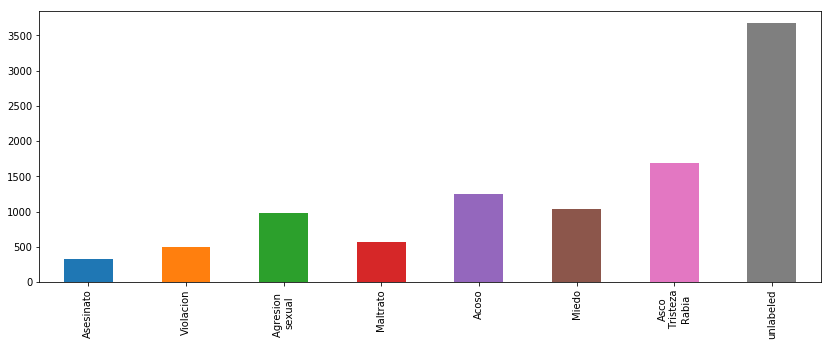

In [555]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
concat_df_labels[text_labels].sum().plot.bar()
plt.show()

In [474]:
from numpy import zeros
embedding_dim = 300
vocabulary_size = 20000
embedding_matrix = zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

# MLP

In [480]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(60,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 128)               7808      
_________________________________________________________________
dropout_71 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 1032      
Total params: 25,352
Trainable params: 25,352
Non-trainable params: 0
_________________________________________________________________


In [481]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS * 10,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1095 samples
Epoch 1/100
7000/7000 [==============================] - 3s 398us/step - loss: 10.6482 - acc: 0.3377 - val_loss: 9.2740 - val_acc: 0.4247
Epoch 2/100
7000/7000 [==============================] - 1s 85us/step - loss: 9.6169 - acc: 0.4024 - val_loss: 9.2736 - val_acc: 0.4247
Epoch 3/100
7000/7000 [==============================] - 1s 85us/step - loss: 9.4065 - acc: 0.4161 - val_loss: 9.2735 - val_acc: 0.4247
Epoch 4/100
7000/7000 [==============================] - 1s 91us/step - loss: 9.6419 - acc: 0.4010 - val_loss: 9.2735 - val_acc: 0.4247
Epoch 5/100
7000/7000 [==============================] - 1s 89us/step - loss: 9.3417 - acc: 0.4200 - val_loss: 9.2734 - val_acc: 0.4247
Epoch 6/100
7000/7000 [==============================] - 1s 86us/step - loss: 9.3338 - acc: 0.4207 - val_loss: 9.2734 - val_acc: 0.4247
Epoch 7/100
7000/7000 [==============================] - 1s 90us/step - loss: 9.3045 - acc: 0.4227 - val_loss: 9.2734 - val_acc: 0.424

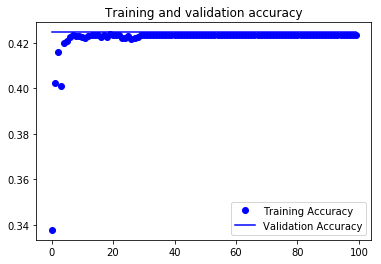

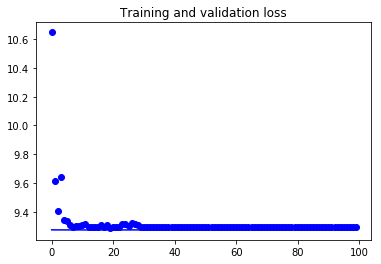

In [482]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [484]:
score = model.evaluate(x_test, y_test,
                       batch_size=BATCH_SIZE, verbose=1)
 
print('Test accuracy:', score[1])

601/601 [==============================] - 0s 55us/step
Test accuracy: 0.39933444264526174


In [485]:
text_labels = enc.classes_
 
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    print('Actual label:', y_test[i])
    print("Predicted label: ", predicted_label)

Actual label: [0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 1. 0. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 0. 0. 1.]
Predicted label:  7
Actual label: [0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 1. 0. 0. 0. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label:  7
Actual label: [0. 0. 1. 0. 0. 0. 0. 0.]
Predicted label:  7
Actual label: [0. 0. 0. 0. 0. 1. 0. 0.]
Predicted label:  7


## CNN + LSTM

In [521]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, LSTM
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=input_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 60, 300)           6000000   
_________________________________________________________________
dropout_73 (Dropout)         (None, 60, 300)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 56, 64)            96064     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 14, 64)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               66000     
_________________________________________________________________
dense_93 (Dense)             (None, 64)                6464      
_________________________________________________________________
batch_normalization_27 (Batc (None, 64)                256       
__________

In [522]:
NUM_EPOCHS=15
BATCH_SIZE=32

In [523]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [524]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.hy')

Train on 7000 samples, validate on 1095 samples
Epoch 1/15
7000/7000 [==============================] - 14s 2ms/step - loss: 1.5403 - acc: 0.4251 - val_loss: 1.5916 - val_acc: 0.4731
Epoch 2/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.2829 - acc: 0.5084 - val_loss: 1.9138 - val_acc: 0.4822
Epoch 3/15
7000/7000 [==============================] - 12s 2ms/step - loss: 1.1927 - acc: 0.5296 - val_loss: 1.1397 - val_acc: 0.5763
Epoch 4/15
7000/7000 [==============================] - 12s 2ms/step - loss: 1.1121 - acc: 0.5704 - val_loss: 1.4025 - val_acc: 0.5479
Epoch 5/15
7000/7000 [==============================] - 12s 2ms/step - loss: 1.0499 - acc: 0.5921 - val_loss: 1.0920 - val_acc: 0.5854
Epoch 6/15
7000/7000 [==============================] - 12s 2ms/step - loss: 0.9986 - acc: 0.6170 - val_loss: 1.1542 - val_acc: 0.5534
Epoch 7/15
7000/7000 [==============================] - 12s 2ms/step - loss: 0.9392 - acc: 0.6424 - val_loss: 1.2428 - val_acc: 0.5425
Epoch 8

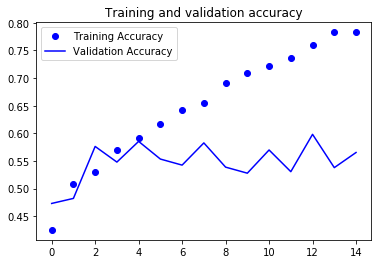

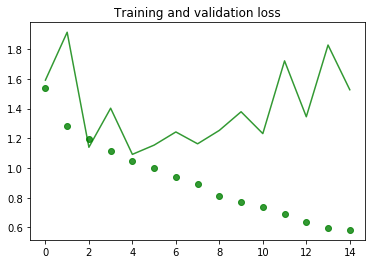

In [525]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', alpha=0.8)
plt.plot(epochs, val_loss, 'g', alpha=0.8)
plt.title('Training and validation loss')
plt.show()

In [526]:
y_pred = model.predict(x_test)
preds = y_pred.argmax(axis=1)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = preds.reshape(len(preds), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

****************************************
[[ 12   4   1   0   1   0   0   3]
 [  1   4   5   1   8   0   1   9]
 [  0   2  20   2  18   1   1  13]
 [  0   6   5   3   5   1   1   6]
 [  1   3   6   0  24   3   1  26]
 [  0   1   0   0   7  11   8  24]
 [  0   0   0   1   4   7  47  53]
 [  3   1   3   0  11   2  20 200]]
****************************************


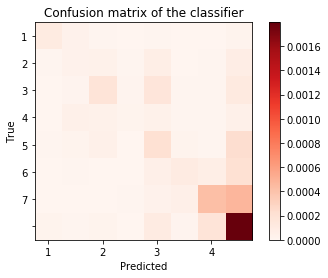

In [543]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(concat_df_labels['category'].values[-len(y_pred):], y_pred.argmax(axis=1))#, labels=text_labels)
print('*'*40)
print(cm)
print('*'*40)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm/df.shape[0], cmap='Reds')
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax, )
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

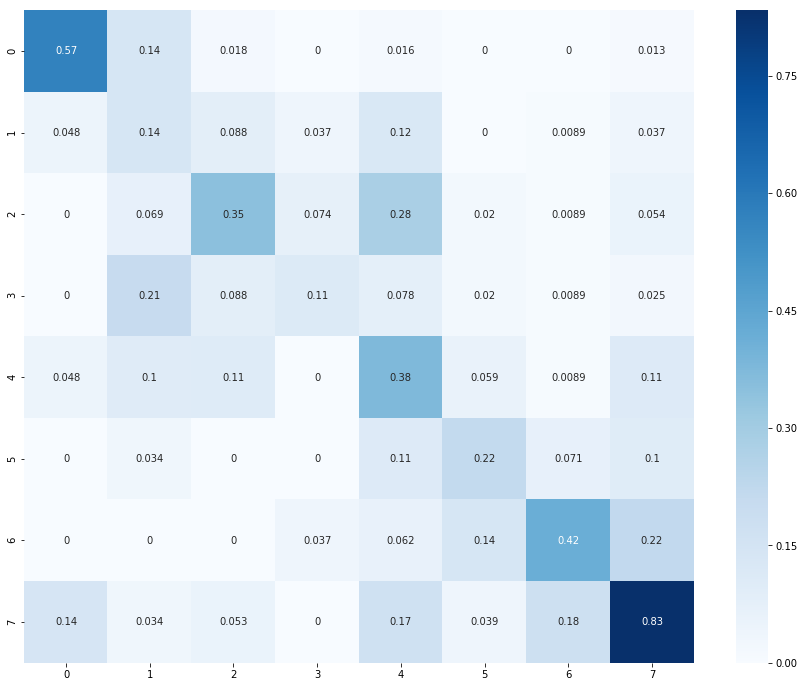

In [567]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cm / cm.sum(axis=1), annot=True, cmap='Blues')
ax.xaxis.set_label_position('top')
plt.show()

#### Let's evaluate with unseen observations

In [574]:
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(texts)
 
texts = df['full_text'].values.tolist()
sequences = tokenizer.texts_to_sequences(texts)

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 21753 unique tokens.


In [578]:
y_preds = model.predict(data)
preds = y_preds.argmax(axis=1)

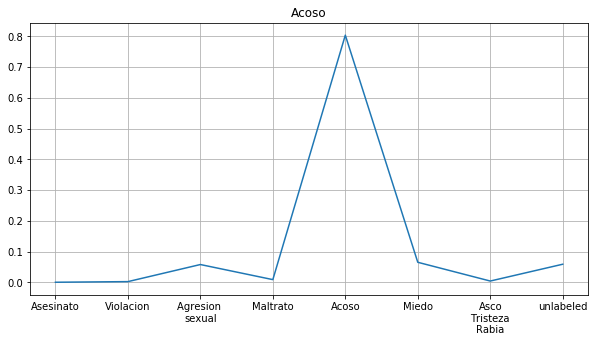

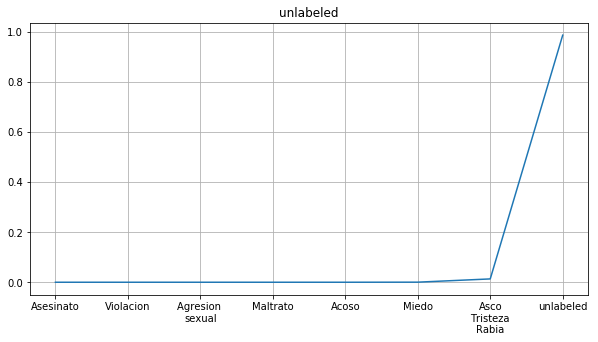

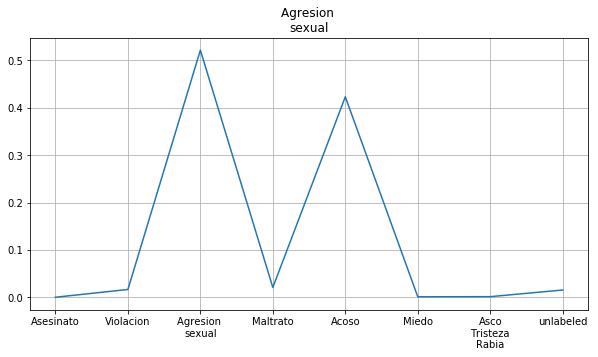

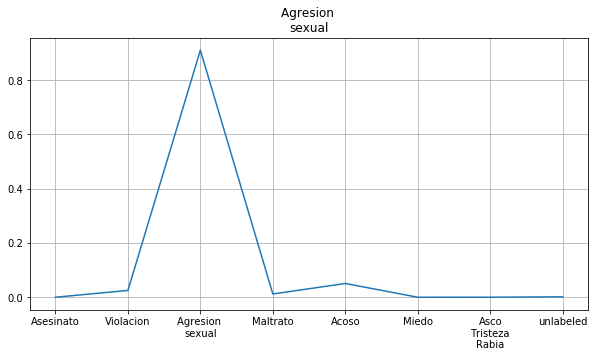

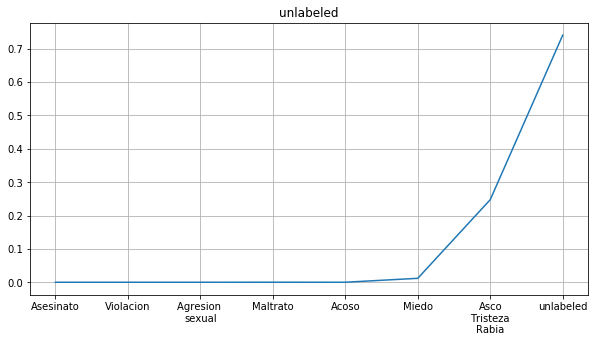

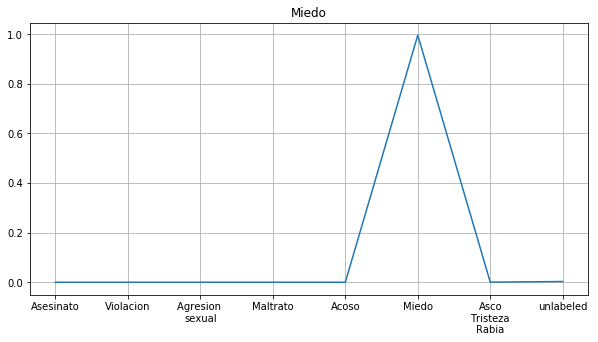

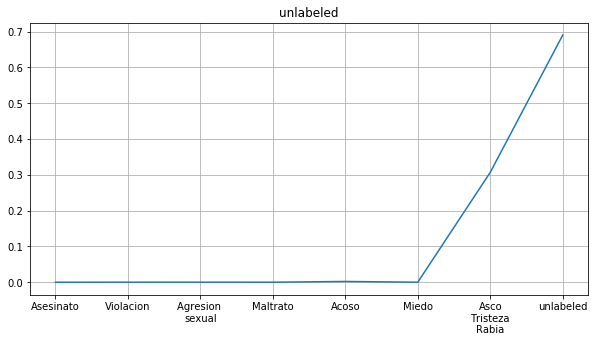

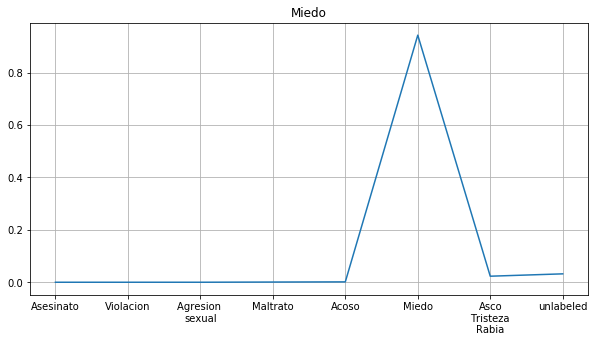

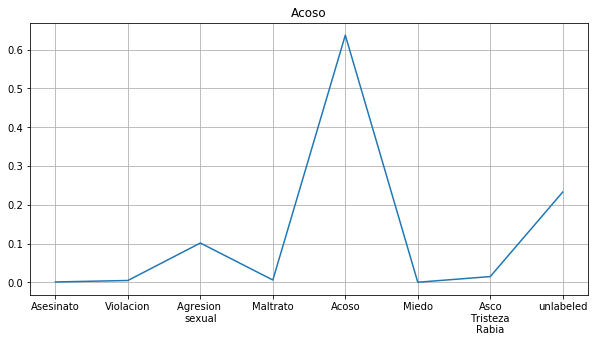

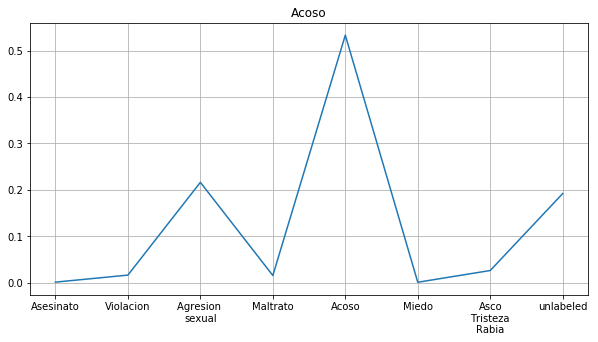

In [697]:
for i in range(10):
    plt.figure(figsize=(10, 5))
    plt.plot(y_preds[i])
    plt.title(text_labels[y_preds[i].argmax()])
    plt.xticks(range(8), text_labels)
    plt.grid(True)
    plt.show()

In [689]:
df.full_text.values[0]

'17 años.Vuelvo a casa con miedo. Se me acerca un chico poco más mayor que yo. Me dice que no tenga miedo que él me acompaña. Todo va bien, hasta que llegó cerca de mi portal y se me lanza a besarme sin motivo alguno.  Luego me sonríe y dice que para la próxima repetimos.#Cuentalo'

In [590]:
count = 0
for i in df[1000:1100].iterrows():
    print('*' * 50)
    print(i[1]['full_text'])
    print('Classified as: {}'.format(text_labels[preds[count]]))
    print('*' * 50)
    count += 1

**************************************************
Cómo me duele este ht #cuéntalo
Classified as: Acoso
**************************************************
**************************************************
Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
Classified as: unlabeled
**************************************************
**************************************************
#Cuentalo quiero que seais libres, no valiente
Classified as: Agresion 
sexual
**************************************************
**************************************************
Un dia paseando por la calle pasé por un bar donde unos hombres me gritaron "ojala disfrutar de esas tetas".
#Cuentalo
Classified as: Agresion 
sexual
**************************************************
**********

## Bidirectional LSTM

In [604]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Bidirectional
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=input_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 60, 300)           6000000   
_________________________________________________________________
dropout_76 (Dropout)         (None, 60, 300)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 56, 64)            96064     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 14, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               132000    
_________________________________________________________________
dense_96 (Dense)             (None, 64)                12864     
_________________________________________________________________
batch_normalization_28 (Batc (None, 64)                256       
__________

In [605]:
NUM_EPOCHS=15
BATCH_SIZE=32

In [606]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [607]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.hy')

Train on 7000 samples, validate on 1095 samples
Epoch 1/15
7000/7000 [==============================] - 15s 2ms/step - loss: 1.5481 - acc: 0.4200 - val_loss: 1.3251 - val_acc: 0.5023
Epoch 2/15
7000/7000 [==============================] - 12s 2ms/step - loss: 1.3096 - acc: 0.4954 - val_loss: 1.2272 - val_acc: 0.5379
Epoch 3/15
7000/7000 [==============================] - 13s 2ms/step - loss: 1.2256 - acc: 0.5267 - val_loss: 1.2760 - val_acc: 0.5461
Epoch 4/15
7000/7000 [==============================] - 13s 2ms/step - loss: 1.1547 - acc: 0.5514 - val_loss: 1.0985 - val_acc: 0.5872
Epoch 5/15
7000/7000 [==============================] - 13s 2ms/step - loss: 1.0828 - acc: 0.5890 - val_loss: 1.4565 - val_acc: 0.4849
Epoch 6/15
7000/7000 [==============================] - 13s 2ms/step - loss: 1.0160 - acc: 0.6136 - val_loss: 1.1206 - val_acc: 0.5616
Epoch 7/15
7000/7000 [==============================] - 15s 2ms/step - loss: 0.9393 - acc: 0.6357 - val_loss: 1.1375 - val_acc: 0.5543
Epoch 8

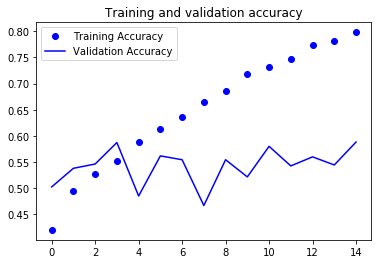

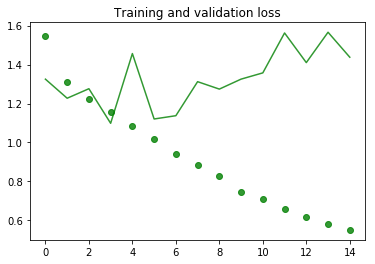

In [608]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', alpha=0.8)
plt.plot(epochs, val_loss, 'g', alpha=0.8)
plt.title('Training and validation loss')
plt.show()

****************************************
[[ 12   4   1   0   1   0   0   3]
 [  1   4   5   1   8   0   1   9]
 [  0   2  20   2  18   1   1  13]
 [  0   6   5   3   5   1   1   6]
 [  1   3   6   0  24   3   1  26]
 [  0   1   0   0   7  11   8  24]
 [  0   0   0   1   4   7  47  53]
 [  3   1   3   0  11   2  20 200]]
****************************************


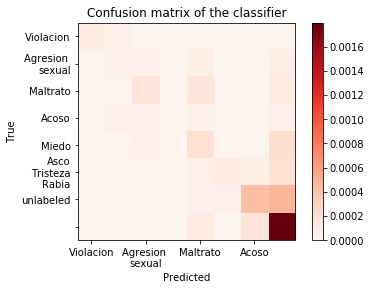

In [626]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(concat_df_labels['category'].values[-len(y_pred):], y_pred.argmax(axis=1))#, labels=text_labels)
print('*'*40)
print(cm)
print('*'*40)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm/df.shape[0], cmap='Reds')
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax, )
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

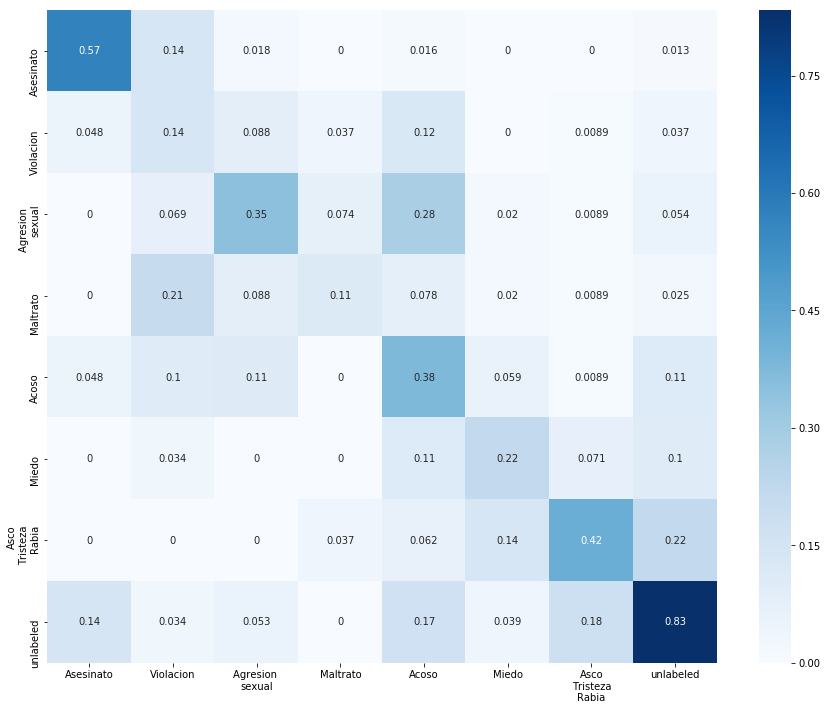

In [674]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cm / cm.sum(axis=1), annot=True, cmap='Blues')
ax.xaxis.set_label_position('top')
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.show()

In [683]:
from numpy import random, zeros

N = 8
a = cm
b = zeros((N,N+1))
b[:,:-1] = a
for i in range(len(b)):
    b[i][-1] = cm.sum(axis=1)[i]

c = zeros((1, N+1))
b = append(b,c).reshape(9, 9)
for i in range(b.shape[1]-1):
    b[-1][i] = cm.sum(axis=0)[i]
    

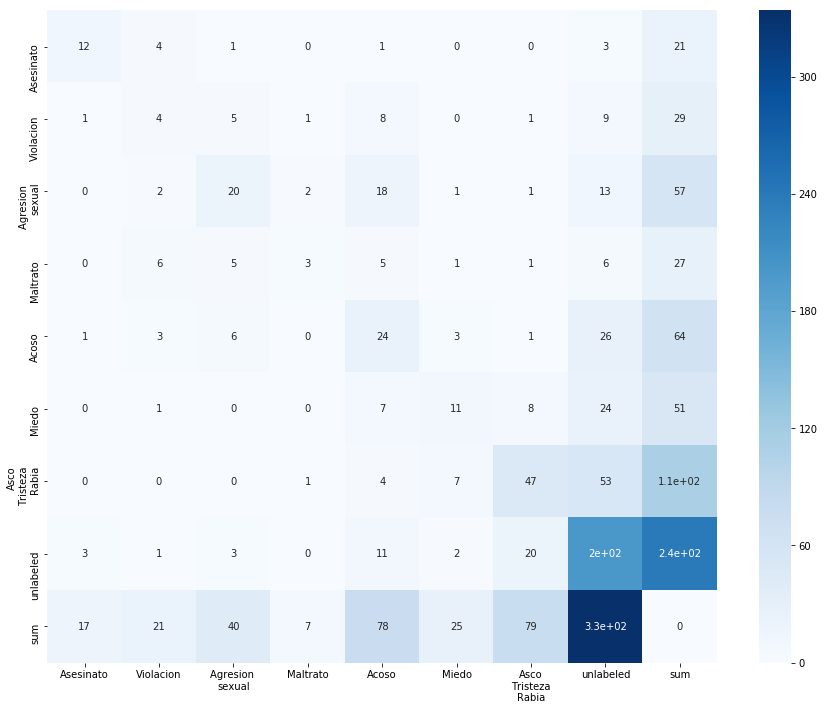

In [684]:
text_labels_w_sum = text_labels +['sum']
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(b, annot=True, cmap='Blues')
ax.xaxis.set_label_position('top')
ax.set_xticklabels(text_labels_w_sum)
ax.set_yticklabels(text_labels_w_sum)
plt.show()